# 확률적 경사 하강법
훈련 세트를 이용해 모델을 학습해야한다.<br>
이때 전체 샘플 중에서 랜덤으로 하나의 샘플을 골라 학습시키는 것이 확률적 경사 하강법이다.

---
### **에포크**
이렇게 랜덤하게 훈련 세트를 **한 번** 모두 사용하는 과정을 **에포크**라고 한다.
일반적으로 수십, 수백 번 이상 에포크를 수행한다.

### **미니배치 경사 하강법**
하나의 샘플이 아니라 여러개의 샘플을 랜덤으로 선택해서 학습시킬 수도 있다. 이는 **미니매치 경사 하강법**이라고 한다.

### **배치 경사 하강법**
또는 극단적으로 전체 샘플을 사용할 수도 있는데 이는 **배치 경사 하강법**이라고 한다.

---
# 손실 함수
위 방법을 반복수행하는 이유는 **손실 함수**의 값을 감소시키기 위해서다.

손실 함수를 어떻게 만드는가
--> 로지스틱 회귀 모델이 확률값을 출력해준다.<br>
<img src="https://t1.daumcdn.net/cfile/tistory/2603F434579AF9B52A" width=300><br>
*x : 모델에서 나온 확률 값*<br>
확률이 1에 가까울수록 손실값은 0에 가까워지고, 확률이 0에 가깝다면 손실 값이 커진다.

위 손실 함수를 **로지스틱 손실 함수** 또는 **이진 크로스엔트로피 손실 함수**라고 부른다.<br>
다중 분류에서 사용하는 손실 함수는 **크로스엔트로피 손실 함수**라고 부른다.


# SGDClassifier

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier 객체를 생성할 때 매개변수 2개를 지정함.
## loss : 손실 함수 종류
## max_iter : 에포크 수
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 정확도가 낮음. 에포크 수를 늘려야겠음

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# 모델을 이어서 훈련시킬 때는 partial_fit() 메소드 사용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


추가적으로 훈련해주니 향상됨을 확인 가능.<br>
얼마나 더 훈련해야하는가 -> 에포크 횟수에 따라 과대적합이나 과소적합이 될 수 있음.

과대적합이 나타나기 이전에 훈련을 종료시키는 것을 **조기 종료**라고 한다.


# 에포크에 따른 정확도를 비교
훈련 세트와 테스트 세트 정확도를 저장할 리스트 2개를 준비<br>
300번의 에포크 수행. 반복할 때마다 정확도 기록 

In [35]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [37]:
for _ in range(1,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

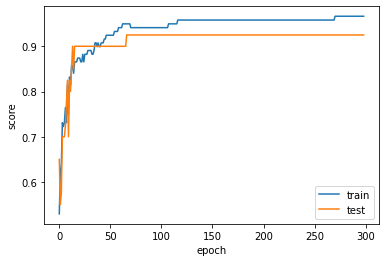

In [39]:
import matplotlib.pyplot as plt

plt.plot(train_score,label='train')
plt.plot(test_score,label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('score')
plt.show()
# 반복 횟수 100이 적당해보임

In [41]:
# 100 에포크로 다시 수행
# SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
# tol 매개변수에서 향상될 최솟값을 지정. None으로 지정함으로써 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 했음.
sc = SGDClassifier(loss='log', max_iter=100, tol=None,  random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 점수 굳!

0.957983193277311
0.925
